# Pymaceuticals Inc.
---

### Analysis

- The drug Capomulin appears to be effective at reducing cancer growth because the average tumor volume and weight were strongly positively correlated with an r value of around .82 . It along with Ramicane appeared to be the best treatments dueo to having the lowest tumor values in the boxplot with all the treatments. A low p-value indicates that it is statstically significant. As from the pie chart you can see that there is little biases of genders as they are near equal.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged = mouse_metadata.merge(study_results)
# Display the data table for preview
merged.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
len(merged['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged = merged.loc[merged['Mouse ID'] != 'g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged = merged.loc[merged['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(merged['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
fd = merged[["Drug Regimen", "Tumor Volume (mm3)"]]
fd2 = fd.groupby("Drug Regimen")
mtv = fd.groupby("Drug Regimen").mean()
mtv = mtv.rename(columns = {'Tumor Volume (mm3)':"Mean Tumor Volume"})
metv = fd.groupby("Drug Regimen").median()
metv = metv.rename(columns = {'Tumor Volume (mm3)':"Median Tumor Volume"})
tvv = fd.groupby("Drug Regimen").var()
tvv = tvv.rename(columns = {'Tumor Volume (mm3)':"Tumor Volume Variance"})
tvsd = fd.groupby("Drug Regimen").std()
tvsd = tvsd.rename(columns = {'Tumor Volume (mm3)':"Tumor Volume Std. Dev."})
tvs = fd.groupby("Drug Regimen").sem()
tvs = tvs.rename(columns = {'Tumor Volume (mm3)':"Tumor Volume Std. Err."})
summary = {"Mean Tumor Volume":mtv,"Median Tumor Volume":metv,"Tumor Volume Variance":tvv,
          "Tumor Volume Std. Dev.":tvsd,"Tumor Volume Std. Err.":tvs}
test = mtv.join(metv)
test = test.join(tvv)
test = test.join(tvsd)
test = test.join(tvs)
test

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg = fd2.agg(['mean', 'median','var','std','sem'])
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

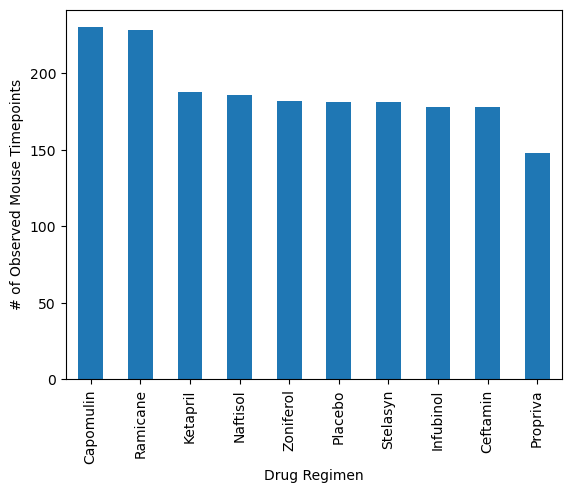

In [20]:
counts = merged['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

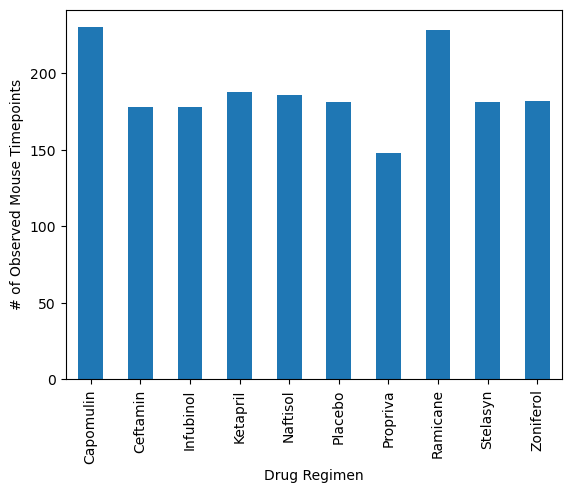

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mousetime = merged.groupby("Drug Regimen")
mousetime["Timepoint"].count().plot(kind = 'bar', ylabel = "# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

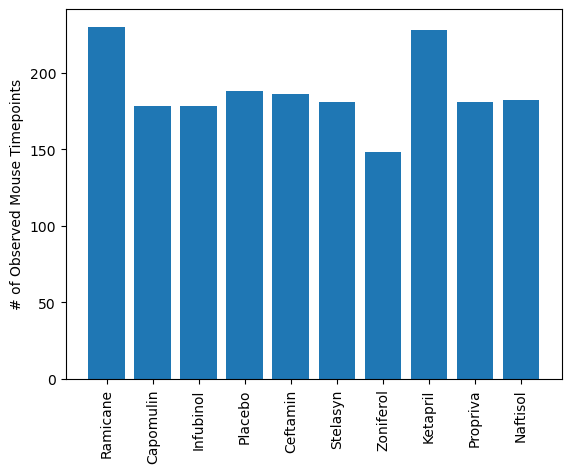

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(merged['Drug Regimen'].unique(), mousetime["Timepoint"].count())
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('# of Observed Mouse Timepoints')

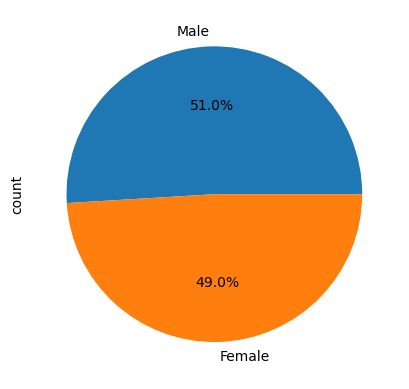

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = merged.Sex.value_counts().plot(kind = 'pie', autopct="%.1f%%" )

Text(0.5, 1.0, 'Sex')

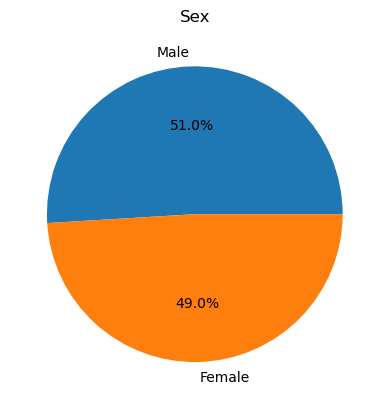

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(merged.Sex.value_counts(), labels = ["Male", "Female"], autopct='%1.1f%%')
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
max_tumor = merged.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
newmerged = max_tumor.merge(merged, on = ["Mouse ID", "Timepoint"], how = "left")
newmerged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = newmerged.loc[newmerged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    
    # add subset 

    tumor_vol_list.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


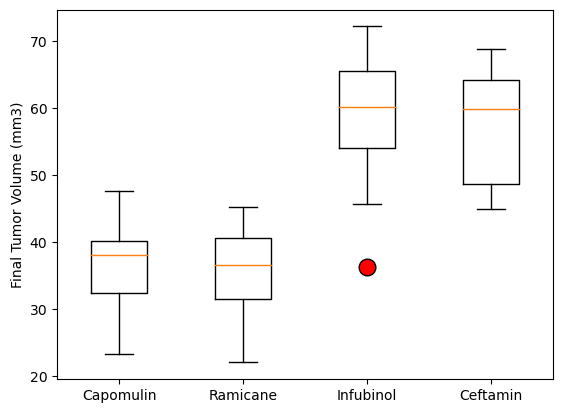

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)

plt.boxplot(tumor_vol_list, labels = drug_list, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

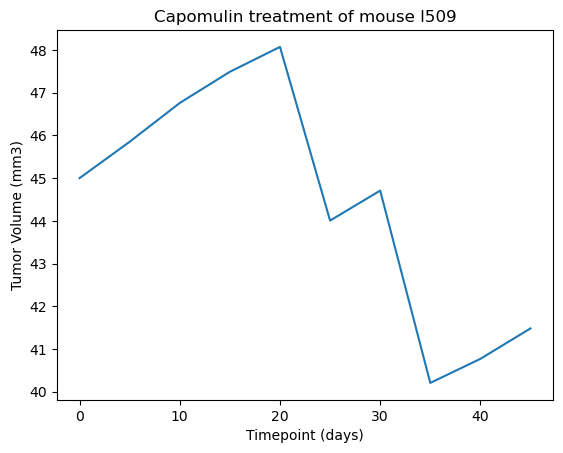

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = merged.loc[merged['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_df.loc[capomulin_df['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

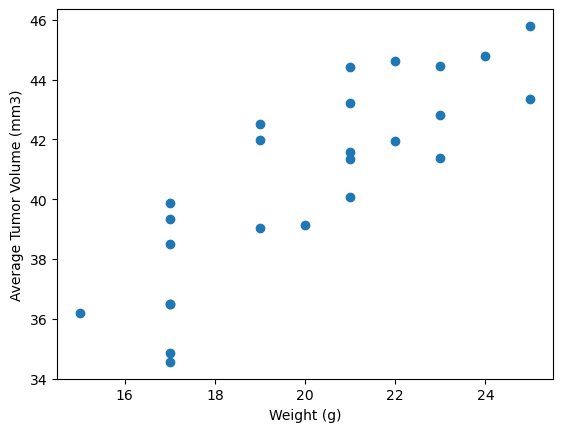

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = merged.loc[merged['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [30]:
st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])


PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712605e-07)

In [31]:
st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The correlation between mouse weight and the average tumor volume is 0.84


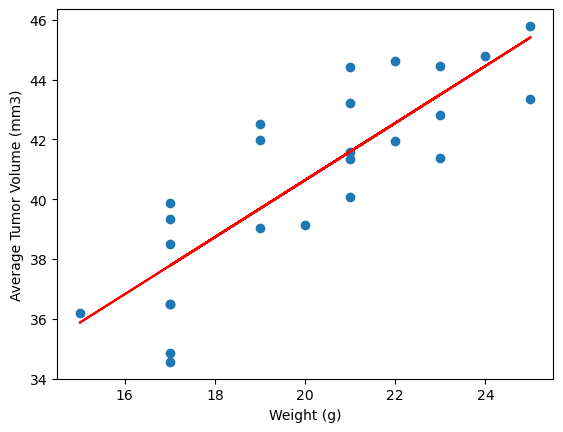

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)'] * model[0] + model[1]

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

plt.plot(capomulin_average['Weight (g)'], y_values, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()